# Install Packages

In [ ]:
!pip install dataframe_image

In [141]:
import pandas as pd
import pickle as pkl
import matplotlib.pyplot as plt
import dataframe_image as dfi
import numpy as np
import itertools

pd.set_option('precision', 3)

# Load Data

In [152]:
tweet_ml_results = pd.read_csv('results/tweet_results_ML.csv')
tweet_dl_results = pd.read_csv('results/results_DL.csv')

tweet_results_lst = [tweet_ml_results, tweet_dl_results]

news_ml_results = pd.read_csv('results/news_results_ML.csv')
news_dl_results_1 = pd.read_csv('results/news_results_DL_shallow_deep.csv')
news_dl_results_2 = pd.read_csv('results/news_results_DL_rnn.csv')
news_dl_results_3 = pd.read_csv('results/news_results_DL_cnn.csv')
news_dl_results_4 = pd.read_csv('results/news_results_DL_rcnn.csv')
news_dl_results_5 = pd.read_csv('results/news_results_DL_bi_rnn.csv')

news_results_lst = [news_ml_results, news_dl_results_1, news_dl_results_2, news_dl_results_3, news_dl_results_4, news_dl_results_5]

with open('news_confusion_matrix.pkl', 'rb') as f:
    news_confusion_matrix = pkl.load(f)

# Plot Confusion Matrix

In [143]:
def plot_confusion_matrix(cm, classes, normalize=True, title='Confusion matrix', cmap=plt.cm.Blues):
    
    plt.figure(figsize=(10,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=2)
        cm[np.isnan(cm)] = 0.0
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.savefig("cm.png")

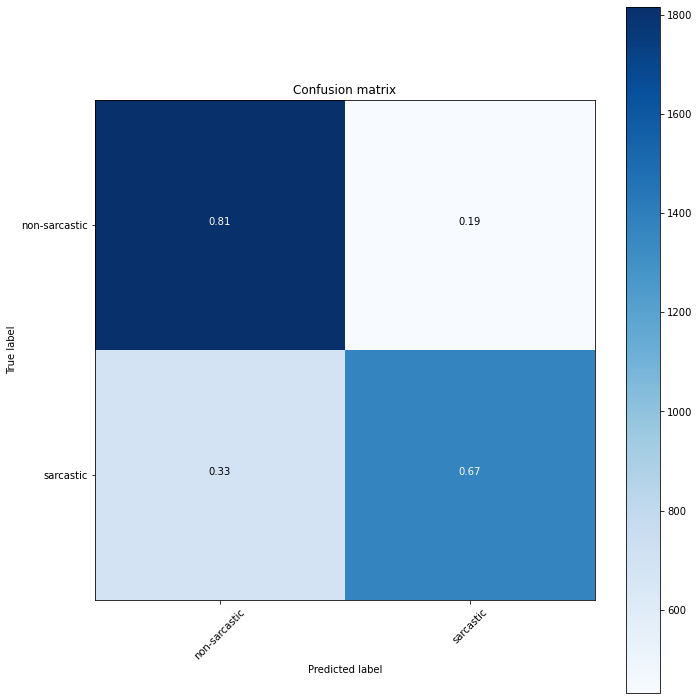

In [144]:
plot_confusion_matrix(news_confusion_matrix, ["non-sarcastic", "sarcastic"])

# Data Merging

In [5]:
common_cols = list(set.intersection(*(set(df.columns) for df in results_lst)))
len(common_cols)

99

In [153]:
tweet_results = pd.concat([df[common_cols] for df in tweet_results_lst], ignore_index=True)
headers = {"test_acc_mean" : "Accuracy", "test_acc_std" : "Accuracy SD", 
           "test_balanced_accuracy_mean" : "Balanced Accuracy", "test_balanced_accuracy_std" : "Balanced Accuracy SD", 
           "test_prec_mean" : "Precesion", "test_prec_std" : "Precesion SD", "test_recall_mean" : "Recall",
           "test_recall_std" : "Recall SD", "test_f1-score_mean" : "F1 Score", "test_f1-score_std" : "F1 Score SD", 
           "test_cohens_kappa_mean" : "Cohen's Kappa", "test_cohens_kappa_std" : "Cohen's Kappa SD", 
           "test_matthews_corrcoef_mean" : "Matthew's Correlation", "test_matthews_corrcoef_std" : "Matthew's Correlation SD", 
           "test_roc_auc_mean" : "ROC AUC", "test_roc_auc_std" : "ROC AUC SD", 'fit_time_mean' : 'Fitting Time', 
           'fit_time_std' : 'Fitting Time SD', 'score_time_mean' : 'Scoring Time', 'score_time_std' : 'Scoring Time SD'}

tweet_results_summary = tweet_results[["Model","test_acc_mean","test_acc_std", "test_balanced_accuracy_mean","test_balanced_accuracy_std", 
         "test_prec_mean", "test_prec_std", "test_recall_mean","test_recall_std", "test_f1-score_mean", 
         "test_f1-score_std", "test_cohens_kappa_mean", "test_cohens_kappa_std", "test_matthews_corrcoef_mean",
         "test_matthews_corrcoef_std", "test_roc_auc_mean", "test_roc_auc_std", 'fit_time_mean', 'fit_time_std', 'score_time_mean', 
         'score_time_std']]

tweet_results_summary.rename(columns=headers,inplace=True)

news_results = pd.concat([df[common_cols] for df in news_results_lst], ignore_index=True)

news_results_summary = news_results[["Model","test_acc_mean","test_acc_std", "test_balanced_accuracy_mean","test_balanced_accuracy_std", 
         "test_prec_mean", "test_prec_std", "test_recall_mean","test_recall_std", "test_f1-score_mean", 
         "test_f1-score_std", "test_cohens_kappa_mean", "test_cohens_kappa_std", "test_matthews_corrcoef_mean",
         "test_matthews_corrcoef_std", "test_roc_auc_mean", "test_roc_auc_std", 'fit_time_mean', 'fit_time_std', 'score_time_mean', 
         'score_time_std']]

news_results_summary.rename(columns=headers,inplace=True)

In [123]:
news_results_summary.columns

Index(['Model', 'Accuracy', 'Accuracy SD', 'Balanced Accuracy',
       'Balanced Accuracy SD', 'Precesion', 'Precesion SD', 'Recall',
       'Recall SD', 'F1 Score', 'F1 Score SD', 'Cohen's Kappa',
       'Cohen's Kappa SD', 'Matthew's Correlation', 'Matthew's Correlation SD',
       'ROC AUC', 'ROC AUC SD', 'Fitting Time', 'Fitting Time SD',
       'Scoring Time', 'Scoring Time SD'],
      dtype='object')

In [75]:
results[["Model","test_acc_mean","test_acc_std", "test_balanced_accuracy_mean","test_balanced_accuracy_std", 
         "test_prec_mean", "test_prec_std", "test_recall_mean","test_recall_std", "test_f1-score_mean", 
         "test_f1-score_std", "test_cohens_kappa_mean", "test_cohens_kappa_std", "test_matthews_corrcoef_mean",
         "test_matthews_corrcoef_std", "test_roc_auc_mean", "test_roc_auc_std"
        ]][results["test_prec_mean"]<1].sort_values(by=["test_prec_mean", "test_recall_mean"
                                                       ], ascending=False).style.background_gradient(cmap ='RdYlGn')

,Model,test_acc_mean,test_acc_std,test_balanced_accuracy_mean,test_balanced_accuracy_std,test_prec_mean,test_prec_std,test_recall_mean,test_recall_std,test_f1-score_mean,test_f1-score_std,test_cohens_kappa_mean,test_cohens_kappa_std,test_matthews_corrcoef_mean,test_matthews_corrcoef_std,test_roc_auc_mean,test_roc_auc_std
1,RF_Words,0.898,0.011,0.803,0.018,0.965,0.017,0.612,0.032,0.749,0.029,0.689,0.034,0.717,0.031,0.803,0.018
2,XGB_Words,0.902,0.005,0.825,0.005,0.916,0.024,0.670,0.009,0.774,0.010,0.713,0.013,0.727,0.015,0.825,0.005
3,SVM_Words,0.764,0.011,0.556,0.013,0.644,0.126,0.138,0.020,0.227,0.032,0.151,0.036,0.215,0.057,0.556,0.013
4,kNN_Words,0.773,0.014,0.591,0.019,0.626,0.068,0.228,0.033,0.333,0.043,0.231,0.046,0.274,0.052,0.591,0.019
5,LR_N-Gram_TF-IDF,0.751,0.001,0.502,0.001,0.600,0.374,0.006,0.003,0.011,0.006,0.007,0.004,0.043,0.028,0.502,0.001
6,XGB_Count_Vectors,0.751,0.005,0.510,0.008,0.537,0.163,0.029,0.016,0.054,0.030,0.030,0.024,0.075,0.053,0.510,0.008
40,Deep_NN_var2_WE,0.745,0.008,0.511,0.006,0.466,0.144,0.045,0.033,0.077,0.047,0.031,0.014,0.063,0.015,0.511,0.006
7,XGB_WordLevel_TF-IDF,0.745,0.007,0.511,0.005,0.449,0.117,0.042,0.005,0.076,0.009,0.032,0.015,0.066,0.034,0.511,0.005
8,LR_CharLevel_TF-IDF,0.750,0.004,0.503,0.006,0.427,0.410,0.009,0.011,0.017,0.021,0.009,0.017,0.033,0.058,0.503,0.006
9,LR_Count_Vectors,0.738,0.007,0.535,0.009,0.423,0.042,0.130,0.017,0.198,0.023,0.092,0.023,0.115,0.028,0.535,0.009


In [154]:
tweet_results_mean = tweet_results_summary[["Model","Accuracy", "Balanced Accuracy", "Precesion", "Recall",
                        "F1 Score", "Cohen's Kappa", "Matthew's Correlation", "ROC AUC"
                      ]].sort_values(by=["Model"], ascending=True
                                    ).style.background_gradient(cmap ='Greens').hide_index()

tweet_results_std = tweet_results_summary[["Model","Accuracy SD", "Balanced Accuracy SD", "Precesion SD", "Recall SD", 
                       "F1 Score SD", "Cohen's Kappa SD", "Matthew's Correlation SD", "ROC AUC SD"
        ]].sort_values(by=["Model"], ascending=True).style.background_gradient(cmap ='Reds').hide_index()

tweet_timing = tweet_results_summary[["Model",'Fitting Time', 'Fitting Time SD', 'Scoring Time', 'Scoring Time SD'
        ]].sort_values(by=["Model"], ascending=True).style.background_gradient(cmap ='RdYlGn_r').hide_index()

news_results_mean = news_results_summary[["Model","Accuracy", "Balanced Accuracy", "Precesion", "Recall",
                        "F1 Score", "Cohen's Kappa", "Matthew's Correlation", "ROC AUC"
                      ]].sort_values(by=["Model"], ascending=True
                                    ).style.background_gradient(cmap ='Greens').hide_index()

news_results_std = news_results_summary[["Model","Accuracy SD", "Balanced Accuracy SD", "Precesion SD", "Recall SD", 
                       "F1 Score SD", "Cohen's Kappa SD", "Matthew's Correlation SD", "ROC AUC SD"
        ]].sort_values(by=["Model"], ascending=True).style.background_gradient(cmap ='Reds').hide_index()

news_timing = news_results_summary[["Model",'Fitting Time', 'Fitting Time SD', 'Scoring Time', 'Scoring Time SD'
        ]].sort_values(by=["Model"], ascending=False).style.background_gradient(cmap ='Reds', 
                                                                                subset=['Scoring Time SD','Fitting Time SD']
                      ).background_gradient(cmap ='Greens', subset=['Scoring Time','Fitting Time']).hide_index()


In [127]:
news_results_mean

Model,Accuracy,Balanced Accuracy,Precesion,Recall,F1 Score,Cohen's Kappa,Matthew's Correlation,ROC AUC
CNN_GRU_WE,0.868,0.868,0.856,0.871,0.863,0.736,0.737,0.868
CNN_LSTM_WE,0.864,0.863,0.876,0.836,0.854,0.728,0.730,0.863
CNN_WE,0.695,0.689,0.746,0.574,0.635,0.382,0.404,0.689
Deep_NN_WE,0.823,0.822,0.824,0.799,0.811,0.644,0.645,0.822
Deep_NN_var1_WE,0.830,0.830,0.828,0.813,0.820,0.660,0.660,0.830
Deep_NN_var2_WE,0.836,0.837,0.817,0.850,0.832,0.672,0.675,0.837
GB_CharLevel_TF-IDF,0.696,0.691,0.720,0.592,0.650,0.385,0.391,0.691
GB_Count_Vectors,0.642,0.626,0.869,0.293,0.437,0.260,0.343,0.626
GB_N-Gram_TF-IDF,0.544,0.521,0.983,0.044,0.084,0.045,0.149,0.521
GB_WordLevel_TF-IDF,0.641,0.625,0.870,0.290,0.435,0.259,0.342,0.625


In [128]:
news_results_std

Model,Accuracy SD,Balanced Accuracy SD,Precesion SD,Recall SD,F1 Score SD,Cohen's Kappa SD,Matthew's Correlation SD,ROC AUC SD
CNN_GRU_WE,0.002,0.002,0.018,0.022,0.003,0.004,0.004,0.002
CNN_LSTM_WE,0.003,0.004,0.028,0.040,0.008,0.007,0.006,0.004
CNN_WE,0.005,0.010,0.058,0.136,0.049,0.015,0.016,0.010
Deep_NN_WE,0.003,0.004,0.008,0.017,0.006,0.007,0.007,0.004
Deep_NN_var1_WE,0.001,0.001,0.015,0.020,0.003,0.002,0.002,0.001
Deep_NN_var2_WE,0.007,0.005,0.030,0.036,0.005,0.012,0.009,0.005
GB_CharLevel_TF-IDF,0.006,0.006,0.010,0.010,0.006,0.011,0.012,0.006
GB_Count_Vectors,0.003,0.003,0.019,0.012,0.011,0.006,0.007,0.003
GB_N-Gram_TF-IDF,0.002,0.002,0.011,0.004,0.007,0.004,0.007,0.002
GB_WordLevel_TF-IDF,0.002,0.002,0.012,0.008,0.008,0.004,0.004,0.002


In [133]:
news_timing

Model,Fitting Time,Fitting Time SD,Scoring Time,Scoring Time SD
kNN_Words,0.016,0.004,6.722,1.757
kNN_WordLevel_TF-IDF,0.006,0.001,6.995,1.716
kNN_N-Gram_TF-IDF,0.004,0.001,6.920,1.795
kNN_Count_Vectors,0.005,0.001,7.781,1.931
kNN_CharLevel_TF-IDF,0.026,0.005,14.615,4.307
XGB_Words,44.545,3.523,0.063,0.007
XGB_WordLevel_TF-IDF,33.405,7.399,0.132,0.030
XGB_N-Gram_TF-IDF,5.999,1.265,0.057,0.008
XGB_Count_Vectors,29.597,4.523,0.137,0.029
XGB_CharLevel_TF-IDF,152.271,29.454,0.082,0.007


In [155]:
dfi.export(tweet_results_mean,"tweet_results_mean.png")
dfi.export(tweet_results_std,"tweet_results_std.png")
dfi.export(news_results_mean,"news_results_mean.png")
dfi.export(news_results_std,"news_results_std.png")
dfi.export(tweet_timing,"tweet_timing.png")

In [78]:
tweet_timing = results[["Model",'fit_time_mean', 'fit_time_std', 'score_time_mean', 'score_time_std'
        ]].sort_values(by=["fit_time_mean", "score_time_mean"
                                                       ], ascending=False).style.background_gradient(cmap ='Reds', subset=['score_time_std','fit_time_std']
                                                                                                    ).background_gradient(cmap ='Greens_r', subset=['fit_time_mean','score_time_mean']).hide_index()

Model,fit_time_mean,fit_time_std,score_time_mean,score_time_std
CNN_WE,2506.708,2544.147,1.877,0.374
RNN_WE,2430.738,2169.003,1.928,0.359
BiRNN_WE,1719.352,860.738,3.702,0.758
RCNN_var3_WE,67.337,71.910,0.751,0.316
RCNN_var2_WE,60.232,24.486,0.731,0.287
RCNN_WE,34.118,24.720,0.363,0.197
RCNN_var1_WE,27.824,27.341,0.374,0.189
BiGRU_WE,25.966,25.034,0.476,0.355
BiLSTM_WE,25.146,18.479,0.345,0.185
Shallow_NN_WE,22.666,18.366,0.079,0.039


In [109]:
results_summary.style.background_gradient(cmap ='Reds', subset=["Accuracy SD", "Balanced Accuracy SD", "Precesion SD", "Recall SD", 
                       "F1 Score SD", "Cohen's Kappa SD", "Matthew's Correlation SD", "ROC AUC SD"
        ]).background_gradient(cmap ='Greens', subset=["Accuracy", "Balanced Accuracy", "Precesion", "Recall",
                        "F1 Score", "Cohen's Kappa", "Matthew's Correlation", "ROC AUC"
        ])



,Model,Accuracy,Accuracy SD,Balanced Accuracy,Balanced Accuracy SD,Precesion,Precesion SD,Recall,Recall SD,F1 Score,F1 Score SD,Cohen's Kappa,Cohen's Kappa SD,Matthew's Correlation,Matthew's Correlation SD,ROC AUC,ROC AUC SD,Fitting Time,Fitting Time SD,Scoring Time,Scoring Time SD
0,GB_Words,0.909,0.005,0.818,0.010,1.000,0.000,0.635,0.021,0.777,0.016,0.723,0.018,0.753,0.015,0.818,0.010,2.387,0.287,0.016,0.004
1,RF_Words,0.898,0.011,0.803,0.018,0.965,0.017,0.612,0.032,0.749,0.029,0.689,0.034,0.717,0.031,0.803,0.018,1.067,0.255,0.116,0.003
2,XGB_Words,0.902,0.005,0.825,0.005,0.916,0.024,0.670,0.009,0.774,0.010,0.713,0.013,0.727,0.015,0.825,0.005,4.097,0.433,0.019,0.003
3,SVM_Words,0.764,0.011,0.556,0.013,0.644,0.126,0.138,0.020,0.227,0.032,0.151,0.036,0.215,0.057,0.556,0.013,0.824,0.174,0.385,0.073
4,kNN_Words,0.773,0.014,0.591,0.019,0.626,0.068,0.228,0.033,0.333,0.043,0.231,0.046,0.274,0.052,0.591,0.019,0.002,0.000,0.150,0.010
5,LR_N-Gram_TF-IDF,0.751,0.001,0.502,0.001,0.600,0.374,0.006,0.003,0.011,0.006,0.007,0.004,0.043,0.028,0.502,0.001,0.086,0.013,0.012,0.003
6,XGB_Count_Vectors,0.751,0.005,0.510,0.008,0.537,0.163,0.029,0.016,0.054,0.030,0.030,0.024,0.075,0.053,0.510,0.008,0.561,0.074,0.017,0.004
7,XGB_WordLevel_TF-IDF,0.745,0.007,0.511,0.005,0.449,0.117,0.042,0.005,0.076,0.009,0.032,0.015,0.066,0.034,0.511,0.005,0.554,0.112,0.017,0.003
8,LR_CharLevel_TF-IDF,0.750,0.004,0.503,0.006,0.427,0.410,0.009,0.011,0.017,0.021,0.009,0.017,0.033,0.058,0.503,0.006,0.144,0.010,0.013,0.003
9,LR_Count_Vectors,0.738,0.007,0.535,0.009,0.423,0.042,0.130,0.017,0.198,0.023,0.092,0.023,0.115,0.028,0.535,0.009,0.148,0.023,0.012,0.003


In [113]:
final_png = results_df[['Model', 'Accuracy', 'Accuracy SD', 'Balanced Accuracy',
       'Balanced Accuracy SD', 'Precesion', 'Precesion SD', 'Recall',
       'Recall SD', 'F1 Score', 'F1 Score SD', "Cohen's Kappa",
       "Cohen's Kappa SD", "Matthew's Correlation", "Matthew's Correlation SD",
       'ROC AUC', 'ROC AUC SD']].style.background_gradient(cmap ='Reds', subset=["Accuracy SD", "Balanced Accuracy SD", "Precesion SD", "Recall SD", 
                       "F1 Score SD", "Cohen's Kappa SD", "Matthew's Correlation SD", "ROC AUC SD"
        ]).background_gradient(cmap ='Greens', subset=["Accuracy", "Balanced Accuracy", "Precesion", "Recall", "F1 Score", 
                                                       "Cohen's Kappa", "Matthew's Correlation", "ROC AUC"
        ]).hide_index()

dfi.export(final_png,"tweet_results.png")
final_png

Model,Accuracy,Accuracy SD,Balanced Accuracy,Balanced Accuracy SD,Precesion,Precesion SD,Recall,Recall SD,F1 Score,F1 Score SD,Cohen's Kappa,Cohen's Kappa SD,Matthew's Correlation,Matthew's Correlation SD,ROC AUC,ROC AUC SD
RF_Words,0.898,0.011,0.803,0.018,0.965,0.017,0.612,0.032,0.749,0.029,0.689,0.034,0.717,0.031,0.803,0.018
XGB_Words,0.902,0.005,0.825,0.005,0.916,0.024,0.670,0.009,0.774,0.010,0.713,0.013,0.727,0.015,0.825,0.005
SVM_Words,0.764,0.011,0.556,0.013,0.644,0.126,0.138,0.020,0.227,0.032,0.151,0.036,0.215,0.057,0.556,0.013
kNN_Words,0.773,0.014,0.591,0.019,0.626,0.068,0.228,0.033,0.333,0.043,0.231,0.046,0.274,0.052,0.591,0.019
LR_N-Gram_TF-IDF,0.751,0.001,0.502,0.001,0.600,0.374,0.006,0.003,0.011,0.006,0.007,0.004,0.043,0.028,0.502,0.001
XGB_Count_Vectors,0.751,0.005,0.510,0.008,0.537,0.163,0.029,0.016,0.054,0.030,0.030,0.024,0.075,0.053,0.510,0.008
Deep_NN_var2_WE,0.745,0.008,0.511,0.006,0.466,0.144,0.045,0.033,0.077,0.047,0.031,0.014,0.063,0.015,0.511,0.006
XGB_WordLevel_TF-IDF,0.745,0.007,0.511,0.005,0.449,0.117,0.042,0.005,0.076,0.009,0.032,0.015,0.066,0.034,0.511,0.005
LR_CharLevel_TF-IDF,0.750,0.004,0.503,0.006,0.427,0.410,0.009,0.011,0.017,0.021,0.009,0.017,0.033,0.058,0.503,0.006
LR_Count_Vectors,0.738,0.007,0.535,0.009,0.423,0.042,0.130,0.017,0.198,0.023,0.092,0.023,0.115,0.028,0.535,0.009
